In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from jupyter_utils import AllDataset

import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
tf.random.set_seed(1)
from cxplain import CXPlain


data_dir = '../drp-data/'
GDSC_GENE_EXPRESSION = 'preprocessed/gdsc_tcga/gdsc_rma_gene_expr.csv'
TCGA_GENE_EXPRESSION = 'preprocessed/gdsc_tcga/tcga_log2_gene_expr.csv'

TCGA_TISSUE = 'preprocessed/tissue_type/TCGA_tissue_one_hot.csv'
GDSC_TISSUE = 'preprocessed/tissue_type/GDSC_tissue_one_hot.csv'

GDSC_lnIC50 = 'preprocessed/drug_response/gdsc_lnic50.csv'
TCGA_DR = 'preprocessed/drug_response/tcga_drug_response.csv'

dataset = AllDataset(data_dir, GDSC_GENE_EXPRESSION, TCGA_GENE_EXPRESSION, 
                     GDSC_lnIC50, TCGA_DR, TCGA_TISSUE)


drugs = [
    'bleomycin',
    'cisplatin',
    'cyclophosphamide',
    'docetaxel',
    'doxorubicin',
    'etoposide',
    'gemcitabine',
    'irinotecan',
    'oxaliplatin',
    'paclitaxel',
    'pemetrexed',
    'tamoxifen',
    'temozolomide',
    'vinorelbine']  

In [15]:
folder = 'CX_ens10'  
attr_dict = {}
conf_dict = {}
for i, drug in enumerate(drugs):
    print(drug)
    _, _, _, test_tcga_expr = dataset.filter_and_normalize_data(drug)
    exp = CXPlain.load('gene_finding/results/%s/%s/explainer'%(folder, drug), custom_model_loader=None, relpath=True)
    attr,conf = exp.explain(test_tcga_expr.values)
    attr = pd.DataFrame(attr, index=test_tcga_expr.index, columns=dataset.genes)
    attr_dict[drug]=attr
    conf_dict[drug] = conf

bleomycin
cisplatin
cyclophosphamide
docetaxel
doxorubicin
etoposide
gemcitabine
irinotecan
oxaliplatin
paclitaxel
pemetrexed
tamoxifen
temozolomide
vinorelbine


In [2]:
conf_dict['bleomycin'].shape

(52, 15650, 2)

In [3]:
attr_dict['bleomycin'].shape

(52, 15650)

In [16]:
low_conf = {}
hi_conf = {}
for drug in drugs:
    low = pd.DataFrame(conf_dict[drug][:,:,0], index=attr_dict[drug].index,columns=attr_dict[drug].columns)
    hi = pd.DataFrame(conf_dict[drug][:,:,1], index=attr_dict[drug].index,columns=attr_dict[drug].columns)
    low_conf[drug] = low
    hi_conf[drug] = hi

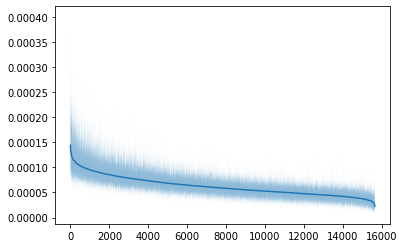

In [5]:
y = attr_dict['bleomycin'].iloc[0].sort_values(ascending=False)
y_low = low_conf['bleomycin'].iloc[0][y.index]
y_hi = hi_conf['bleomycin'].iloc[0][y.index]


# plt.subplots(figsize=(10, 4))
plt.plot(range(len(y)), y.values)
plt.fill_between(range(len(y)), y_low, y_hi, alpha=0.5)
# plt.xlim(left=-10, right=100)

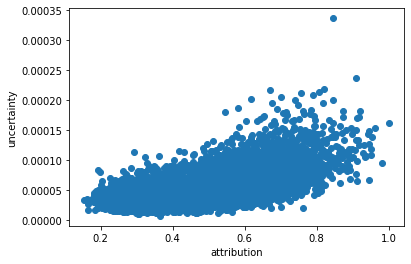

In [11]:
conf = y_hi - y_low
plt.scatter(y/y.max(), conf)
plt.ylabel("uncertainty")
plt.xlabel("attribution")
plt.show()

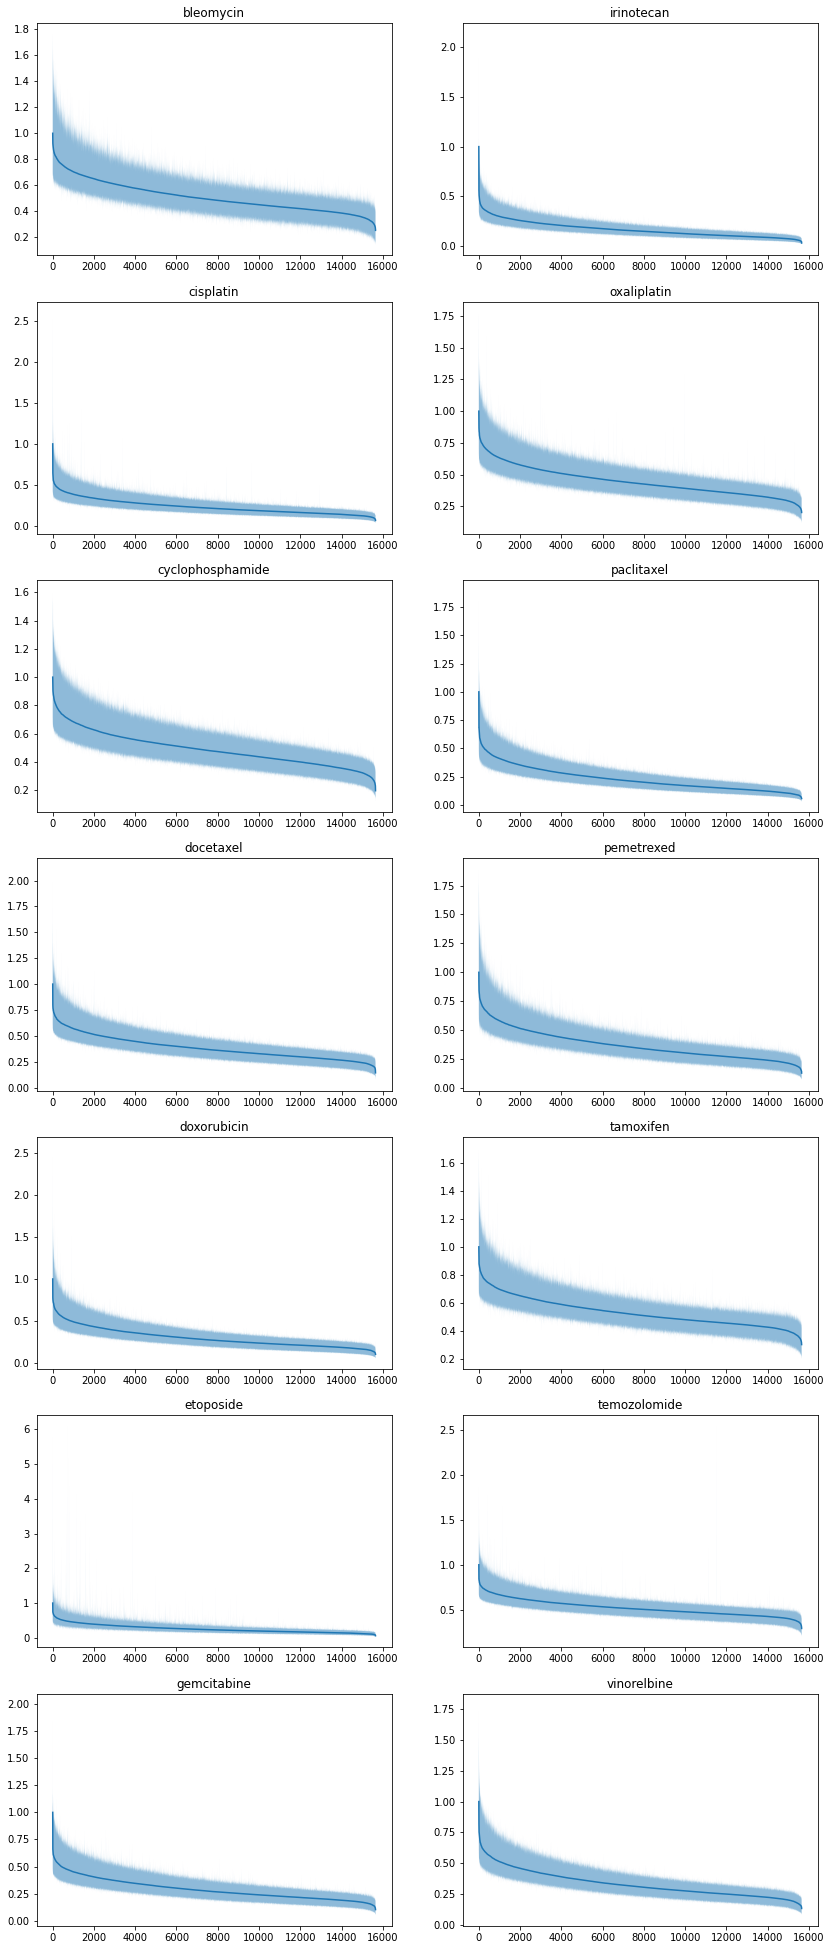

In [23]:
fig, axes = plt.subplots(7, 2, figsize=(14, 35))
for i, drug in enumerate(drugs):
    y = attr_dict[drug].mean(axis=0).sort_values(ascending=False)
    y_low = low_conf[drug][y.index].mean(axis=0)
    y_hi = hi_conf[drug][y.index].mean(axis=0)
    
    ax = axes[i%7][i//7]
    
    ax.plot(range(len(y)), y/y.max())
    ax.fill_between(range(len(y)), y_low/y.max(), y_hi/y.max(), alpha=0.5)
    ax.set_title(drug)

In [ ]:
fro i asd